In [1]:
#Importing required libraries..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing the Data..
cities=pd.read_csv('dim_cities.csv')
dates=pd.read_csv('dim_date.csv')
plans=pd.read_csv('dim_plan.csv')
metrics=pd.read_csv('fact_atliqo_metrics.csv')
market_share=pd.read_csv('fact_market_share.csv')
plan_revenue=pd.read_csv('fact_plan_revenue.csv')

In [4]:
cities.head()

,city_code,city_name
0,400001,Mumbai
1,110001,Delhi
2,700001,Kolkata
3,560001,Bangalore
4,600001,Chennai


In [57]:
cities.shape

(15, 2)

In [5]:
dates.head()

,date,month_name,before/after_5g,time_period
0,01-Jan-22,Jan,Before 5G,1
1,01-Feb-22,Feb,Before 5G,2
2,01-Mar-22,Mar,Before 5G,3
3,01-Apr-22,Apr,Before 5G,4
4,01-Jun-22,Jun,After 5G,1


In [58]:
dates.shape

(8, 4)

In [6]:
plans.head()

,plan,plan_description
0,p1,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1,p2,Super Saviour Pack (1.5 GB / Day Combo For 56 ...
2,p3,Elite saver Pack (1 GB/ Day) Valid: 28 Days
3,p4,Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days
4,p5,Rs. 99 Full Talktime Combo Pack


In [59]:
plans.shape

(13, 2)

In [7]:
metrics.head()

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25
3,01-Jan-22,560001,Atliqo,37.40,175,21.37,1.39
4,01-Jan-22,600001,Atliqo,30.80,203,15.17,1.12


In [60]:
metrics.shape

(120, 7)

In [8]:
market_share.head()

,date,city_code,tmv_city_crores,company,ms_pct
0,01-Jan-22,400001,286.29,Atliqo,21.20
1,01-Jan-22,110001,241.59,Atliqo,17.68
2,01-Jan-22,700001,222.19,Atliqo,16.61
3,01-Jan-22,560001,195.41,Atliqo,19.14
4,01-Jan-22,600001,166.78,Atliqo,18.47


In [61]:
market_share.shape

(600, 5)

In [38]:
plan_revenue.head()

,date,city_code,plans,plan_revenue_crores
0,01-Jan-22,400001,p1,6.26
1,01-Jan-22,110001,p1,4.58
2,01-Jan-22,700001,p1,4.29
3,01-Jan-22,560001,p1,4.26
4,01-Jan-22,600001,p1,3.60


In [62]:
plan_revenue.shape

(1200, 4)

In [12]:
city_metrics=metrics.merge(cities,on='city_code')

In [13]:
city_metrics.head()

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,city_name
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90,Mumbai
1,01-Feb-22,400001,Atliqo,61.19,169,36.21,2.71,Mumbai
2,01-Mar-22,400001,Atliqo,57.28,213,26.89,2.33,Mumbai
3,01-Apr-22,400001,Atliqo,65.24,213,30.63,2.64,Mumbai
4,01-Jun-22,400001,Atliqo,62.09,193,32.17,2.41,Mumbai


In [15]:
city_metrics['city_code'].value_counts()

400001    8
110001    8
700001    8
560001    8
600001    8
500001    8
411001    8
380001    8
302001    8
226001    8
800008    8
641001    8
160017    8
122001    8
492001    8
Name: city_code, dtype: int64

In [16]:
city_metrics['city_name'].value_counts()

Mumbai        8
Delhi         8
Kolkata       8
Bangalore     8
Chennai       8
Hyderabad     8
Pune          8
Ahmedabad     8
Jaipur        8
Lucknow       8
Patna         8
Coimbatore    8
Chandigarh    8
Gurgaon       8
Raipur        8
Name: city_name, dtype: int64

<AxesSubplot:xlabel='city_name'>

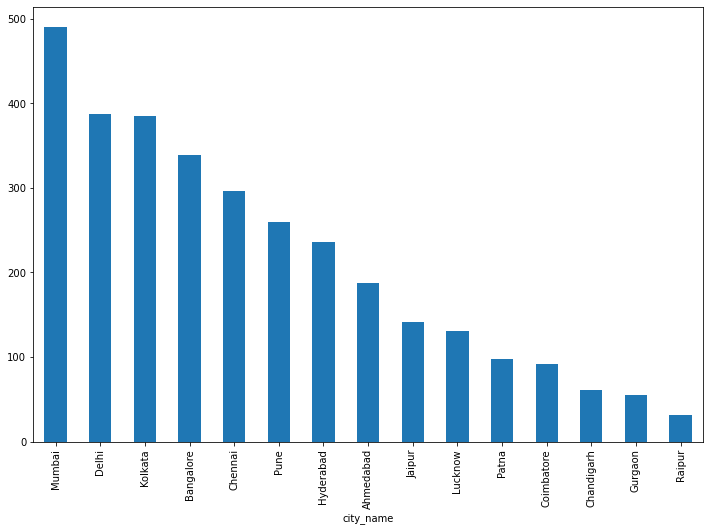

In [30]:
plt.figure(figsize=(12,8))
city_metrics.groupby(by='city_name')['atliqo_revenue_crores'].sum().sort_values(ascending=False).plot(kind='bar')

In [34]:
city_metrics['date'].value_counts()

01-Jan-22    15
01-Feb-22    15
01-Mar-22    15
01-Apr-22    15
01-Jun-22    15
01-Jul-22    15
01-Aug-22    15
01-Sep-22    15
Name: date, dtype: int64

In [36]:
dated_city_metrics=city_metrics.merge(dates,on='date')

In [37]:
dated_city_metrics.head()

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,city_name,month_name,before/after_5g,time_period
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90,Mumbai,Jan,Before 5G,1
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31,Delhi,Jan,Before 5G,1
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25,Kolkata,Jan,Before 5G,1
3,01-Jan-22,560001,Atliqo,37.40,175,21.37,1.39,Bangalore,Jan,Before 5G,1
4,01-Jan-22,600001,Atliqo,30.80,203,15.17,1.12,Chennai,Jan,Before 5G,1


In [47]:
plan_revenue.rename(columns={'plans':'plan'},inplace=True)

In [48]:
plan_revenue.head()

,date,city_code,plan,plan_revenue_crores
0,01-Jan-22,400001,p1,6.26
1,01-Jan-22,110001,p1,4.58
2,01-Jan-22,700001,p1,4.29
3,01-Jan-22,560001,p1,4.26
4,01-Jan-22,600001,p1,3.60


In [50]:
new_plan=plan_revenue.merge(plans,on='plan')

In [51]:
new_plan.head()

,date,city_code,plan,plan_revenue_crores,plan_description
0,01-Jan-22,400001,p1,6.26,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1,01-Jan-22,110001,p1,4.58,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
2,01-Jan-22,700001,p1,4.29,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
3,01-Jan-22,560001,p1,4.26,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
4,01-Jan-22,600001,p1,3.60,Smart Recharge Pack (2 GB / Day Combo For 3 mo...


In [53]:
dated_city_metrics.head()

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,city_name,month_name,before/after_5g,time_period
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90,Mumbai,Jan,Before 5G,1
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31,Delhi,Jan,Before 5G,1
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25,Kolkata,Jan,Before 5G,1
3,01-Jan-22,560001,Atliqo,37.40,175,21.37,1.39,Bangalore,Jan,Before 5G,1
4,01-Jan-22,600001,Atliqo,30.80,203,15.17,1.12,Chennai,Jan,Before 5G,1


In [55]:
dated_city_metrics.shape

(120, 11)

In [56]:
new_plan.shape

(1200, 5)

### Let's try to pull insight from the available data and analyze the market..

In [63]:
import copy
df=copy.deepcopy(dated_city_metrics)

In [64]:
df.head(2)

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,city_name,month_name,before/after_5g,time_period
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90,Mumbai,Jan,Before 5G,1
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31,Delhi,Jan,Before 5G,1


In [69]:
bdf=df[df['before/after_5g']=='Before 5G']
adf=df[df['before/after_5g']=='After 5G']

<AxesSubplot:xlabel='city_name'>

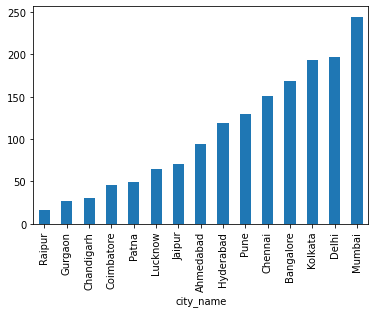

In [75]:
bdf.groupby(by='city_name')['atliqo_revenue_crores'].sum().sort_values(ascending=True).plot(kind='bar')

<AxesSubplot:xlabel='city_name'>

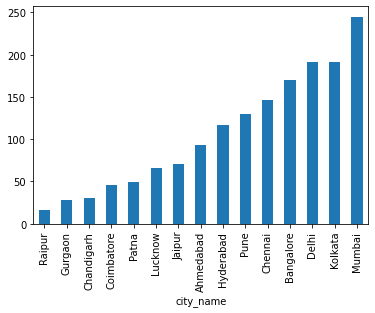

In [76]:
adf.groupby(by='city_name')['atliqo_revenue_crores'].sum().sort_values(ascending=True).plot(kind='bar')

In [86]:
adf.groupby(by='city_name')['atliqo_revenue_crores'].sum().sort_index(ascending=True)

city_name
Ahmedabad      92.58
Bangalore     169.94
Chandigarh     30.51
Chennai       146.24
Coimbatore     45.72
Delhi         190.82
Gurgaon        27.53
Hyderabad     117.10
Jaipur         70.78
Kolkata       191.84
Lucknow        66.01
Mumbai        245.15
Patna          49.46
Pune          130.12
Raipur         15.86
Name: atliqo_revenue_crores, dtype: float64

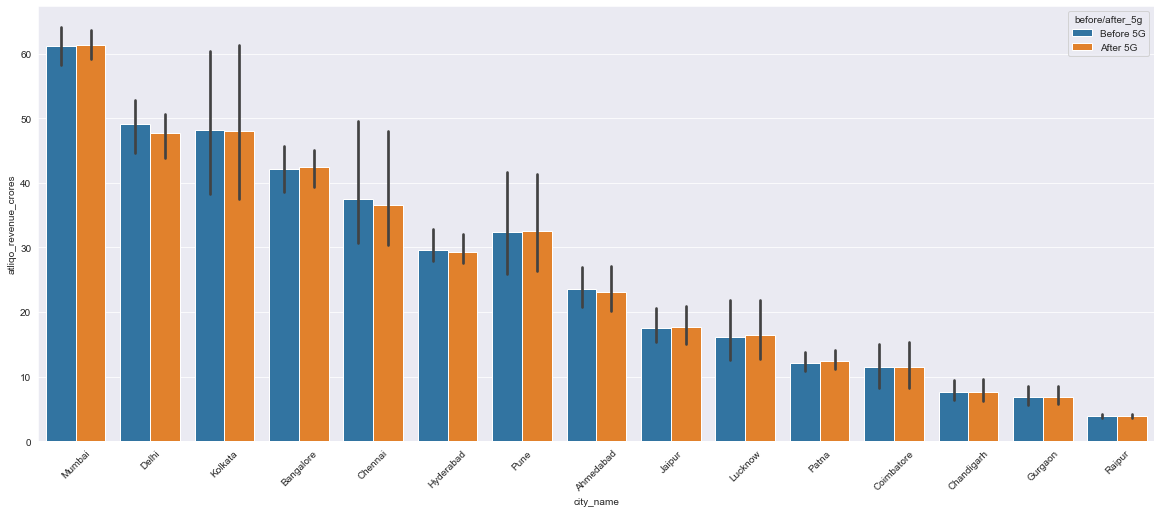

In [136]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.barplot(x='city_name',y='atliqo_revenue_crores',data=df,hue='before/after_5g')
plt.xticks(rotation=45)
plt.show()

In [110]:
adf.groupby(by='city_name')['atliqo_revenue_crores'].sum().sort_index(ascending=True).index

Index(['Ahmedabad', 'Bangalore', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Gurgaon', 'Hyderabad', 'Jaipur', 'Kolkata', 'Lucknow',
       'Mumbai', 'Patna', 'Pune', 'Raipur'],
      dtype='object', name='city_name')

In [112]:
adf.groupby(by='city_name')['atliqo_revenue_crores'].sum().sort_index(ascending=True).values

array([ 92.58, 169.94,  30.51, 146.24,  45.72, 190.82,  27.53, 117.1 ,
        70.78, 191.84,  66.01, 245.15,  49.46, 130.12,  15.86])

In [113]:
bdf.groupby(by='city_name')['atliqo_revenue_crores'].sum().sort_index(ascending=True).values

array([ 94.49, 168.67,  30.68, 150.13,  45.67, 196.38,  27.12, 118.63,
        70.09, 192.55,  64.83, 244.4 ,  48.74, 129.64,  15.68])

In [111]:
city_list=['Ahmedabad', 'Bangalore', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Gurgaon', 'Hyderabad', 'Jaipur', 'Kolkata', 'Lucknow',
       'Mumbai', 'Patna', 'Pune', 'Raipur']

In [114]:
after_5G_rev=[ 92.58, 169.94,  30.51, 146.24,  45.72, 190.82,  27.53, 117.1 ,
        70.78, 191.84,  66.01, 245.15,  49.46, 130.12,  15.86]

In [115]:
before_5G_rev=[94.49, 168.67,  30.68, 150.13,  45.67, 196.38,  27.12, 118.63,
        70.09, 192.55,  64.83, 244.4 ,  48.74, 129.64,  15.68]

In [116]:
X_axis_values=np.arange(len(city_list))

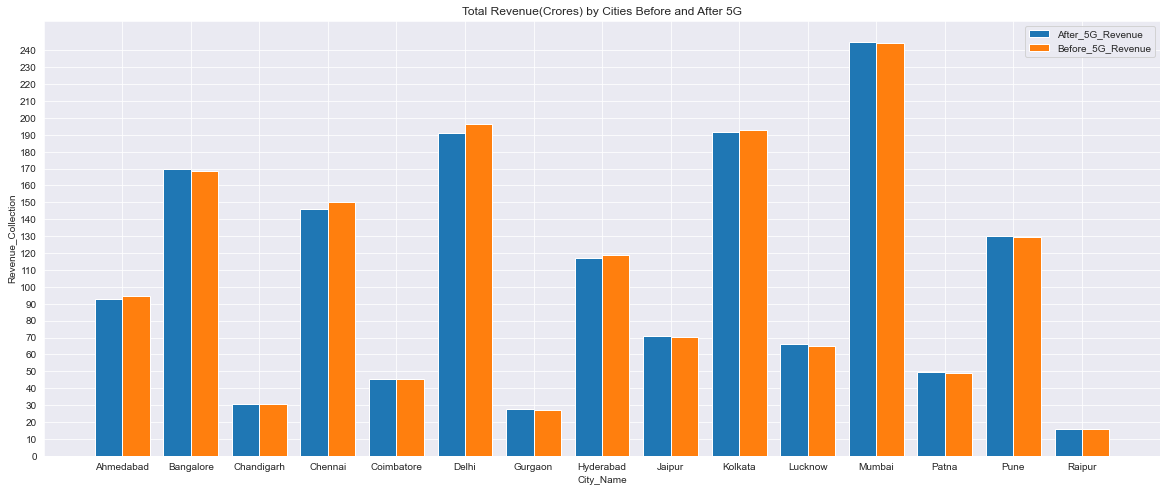

In [173]:
plt.figure(figsize=(20,8))
plt.bar(X_axis_values-0.2,after_5G_rev,width=0.4,label='After_5G_Revenue')
plt.bar(X_axis_values+0.2,before_5G_rev,width=0.4,label='Before_5G_Revenue')

plt.xticks(ticks=X_axis_values,labels=city_list)
plt.yticks(range(0,250,10))

plt.xlabel('City_Name')
plt.ylabel('Revenue_Collection')
plt.title('Total Revenue(Crores) by Cities Before and After 5G')
plt.legend()
plt.show()

<AxesSubplot:xlabel='month_name'>

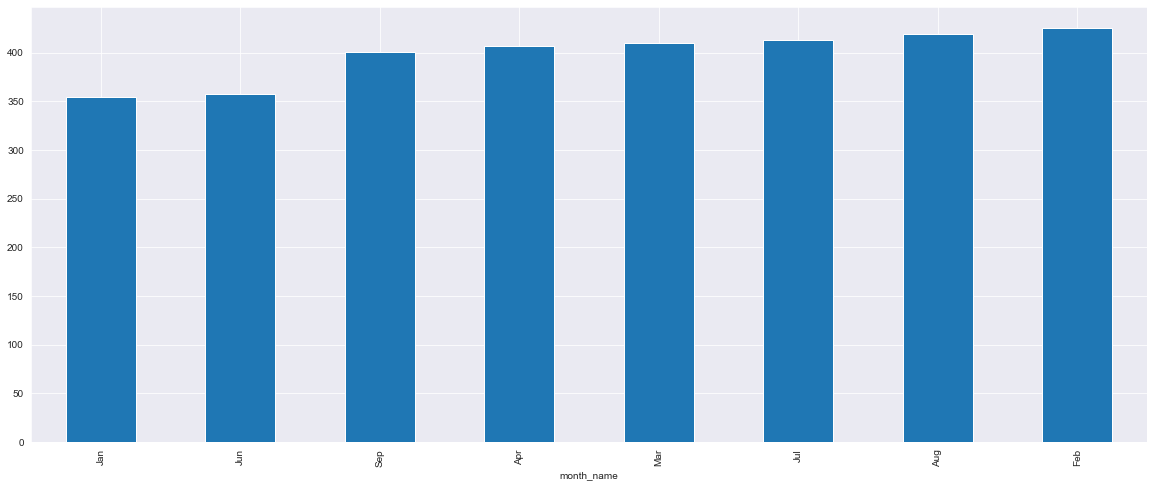

In [144]:
plt.figure(figsize=(20,8))
df.groupby(by='month_name')['atliqo_revenue_crores'].sum().sort_values(ascending=True).plot(kind='bar')

<AxesSubplot:xlabel='month_name'>

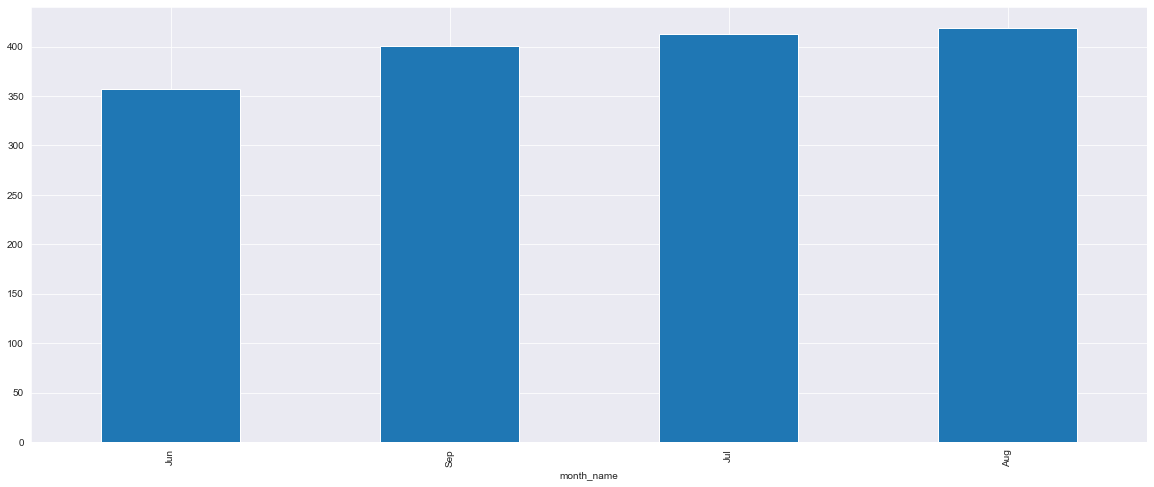

In [145]:
plt.figure(figsize=(20,8))
adf.groupby(by='month_name')['atliqo_revenue_crores'].sum().sort_values(ascending=True).plot(kind='bar')

<AxesSubplot:xlabel='month_name'>

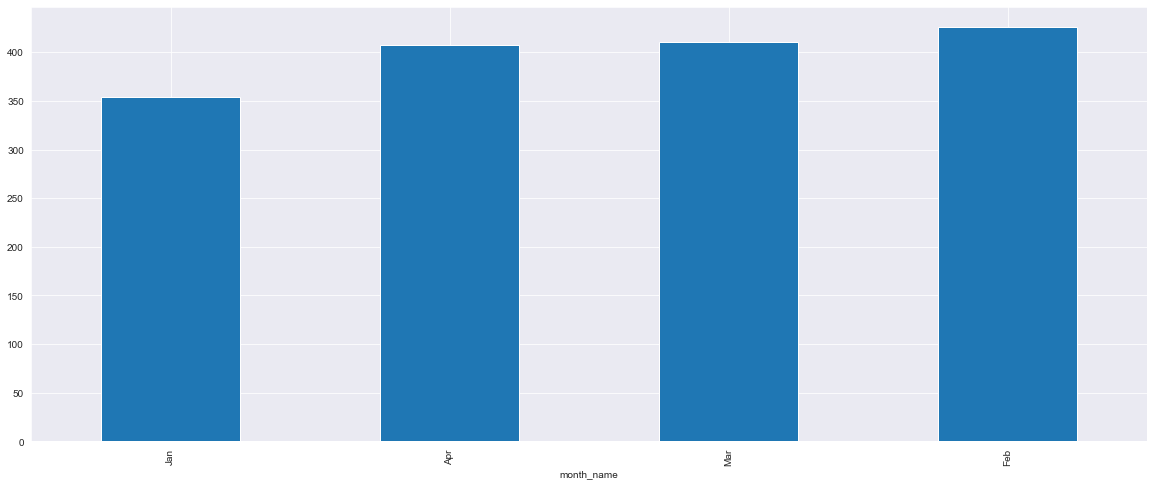

In [146]:
plt.figure(figsize=(20,8))
bdf.groupby(by='month_name')['atliqo_revenue_crores'].sum().sort_values(ascending=True).plot(kind='bar')

In [148]:
df.sample(1)

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,city_name,month_name,before/after_5g,time_period
20,01-Feb-22,500001,Atliqo,34.47,193,17.86,1.13,Hyderabad,Feb,Before 5G,2


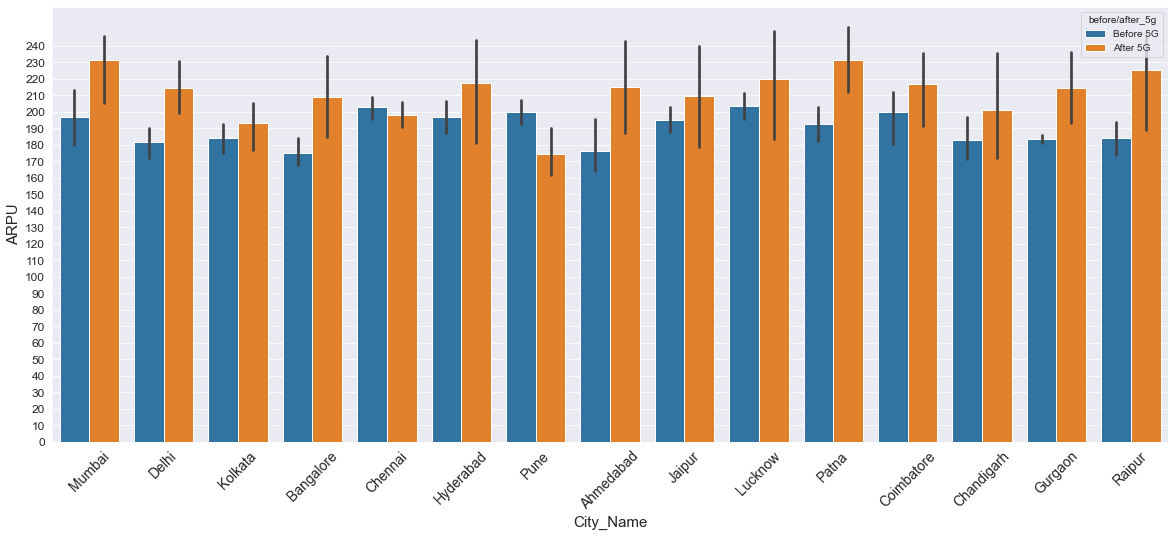

In [166]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.barplot(x='city_name',y='arpu',data=df,hue='before/after_5g')
plt.xticks(rotation=45,size=14)
plt.yticks(np.arange(0,250,10),size=12)

plt.xlabel('City_Name',size=15)
plt.ylabel('ARPU',size=15)

plt.show()

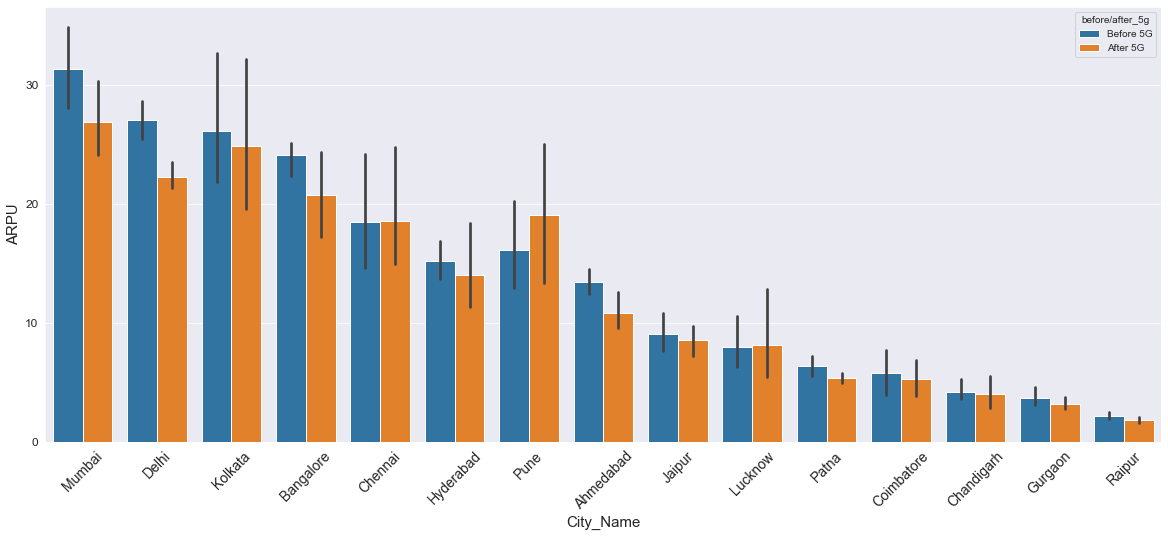

In [170]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.barplot(x='city_name',y='active_users_lakhs',data=df,hue='before/after_5g')
plt.xticks(rotation=45,size=14)
plt.yticks(np.arange(0,40,10),size=12)

plt.xlabel('City_Name',size=15)
plt.ylabel('ARPU',size=15)

plt.show()

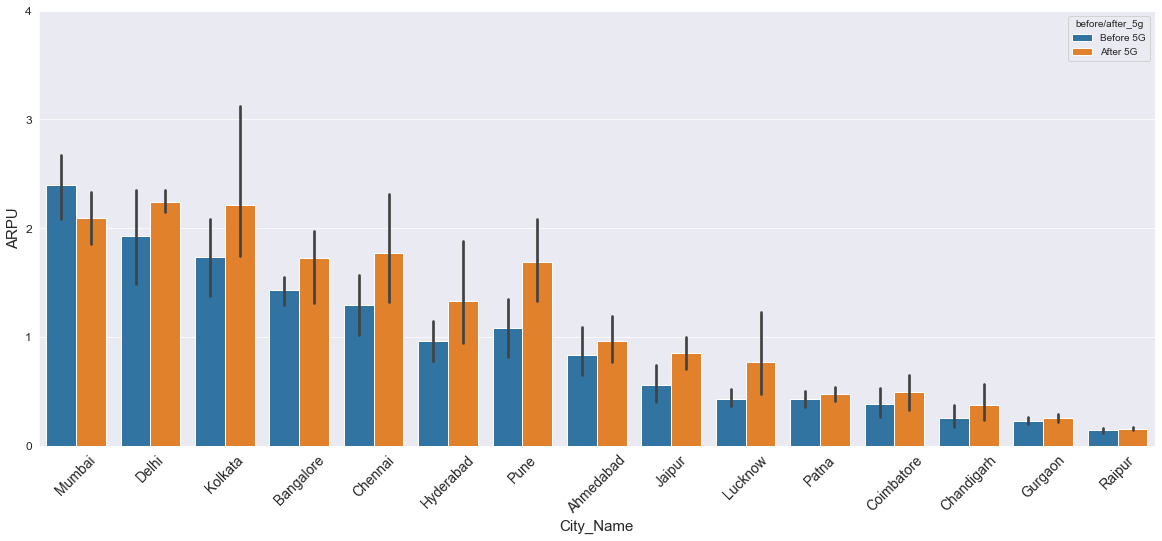

In [175]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.barplot(x='city_name',y='unsubscribed_users_lakhs',data=df,hue='before/after_5g')
plt.xticks(rotation=45,size=14)
plt.yticks(np.arange(0,5),size=12)

plt.xlabel('City_Name',size=15)
plt.ylabel('ARPU',size=15)

plt.show()

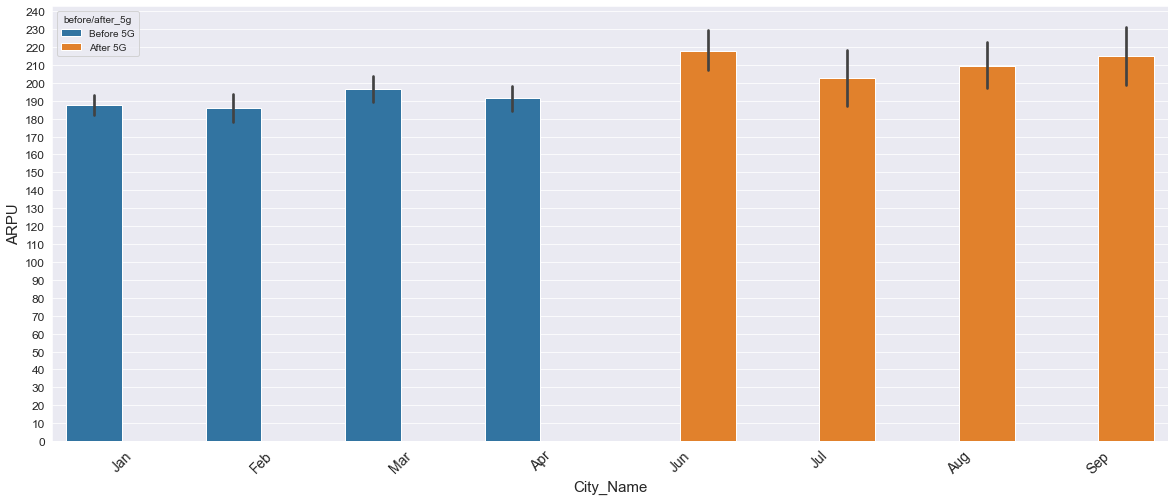

In [176]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.barplot(x='month_name',y='arpu',data=df,hue='before/after_5g')
plt.xticks(rotation=45,size=14)
plt.yticks(np.arange(0,250,10),size=12)

plt.xlabel('City_Name',size=15)
plt.ylabel('ARPU',size=15)

plt.show()

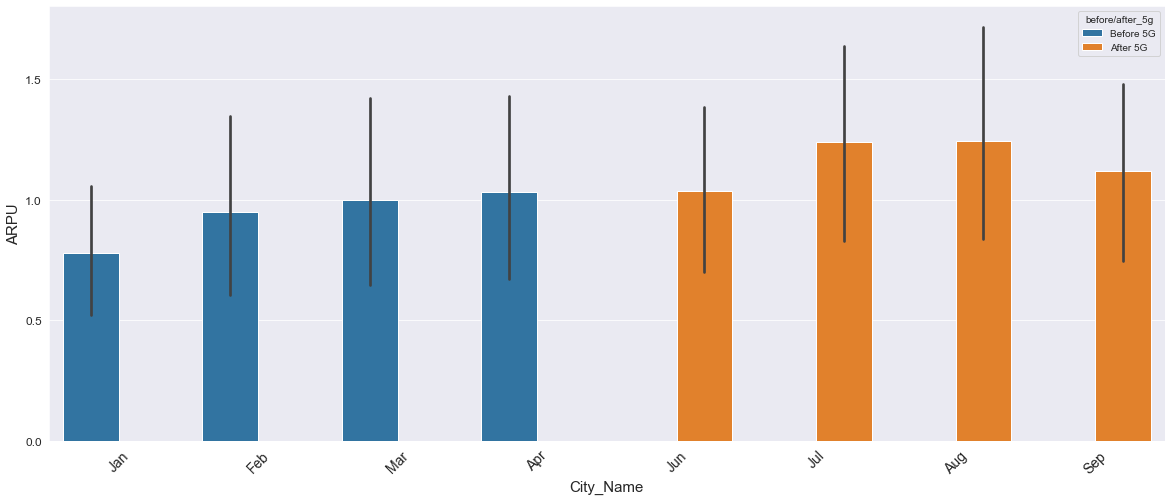

In [179]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.barplot(x='month_name',y='unsubscribed_users_lakhs',data=df,hue='before/after_5g')
plt.xticks(rotation=45,size=14)
plt.yticks(np.arange(0,2,.5),size=12)

plt.xlabel('City_Name',size=15)
plt.ylabel('ARPU',size=15)

plt.show()

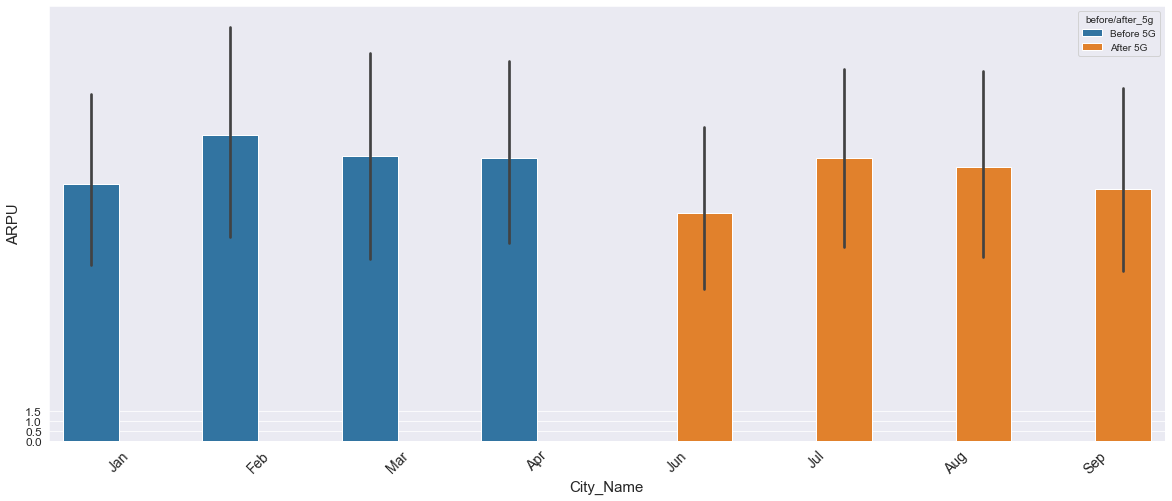

In [180]:
plt.figure(figsize=(20,8))
sns.set_style('darkgrid')
sns.barplot(x='month_name',y='active_users_lakhs',data=df,hue='before/after_5g')
plt.xticks(rotation=45,size=14)
plt.yticks(np.arange(0,2,.5),size=12)

plt.xlabel('City_Name',size=15)
plt.ylabel('ARPU',size=15)

plt.show()

<AxesSubplot:xlabel='month_name'>

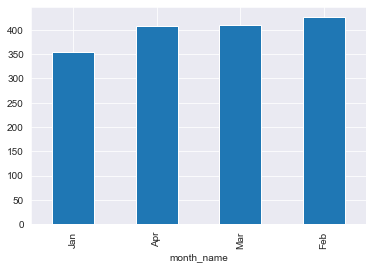

In [181]:
bdf.groupby(by='month_name')['atliqo_revenue_crores'].sum().sort_values(ascending=True).plot(kind='bar')

<AxesSubplot:xlabel='month_name'>

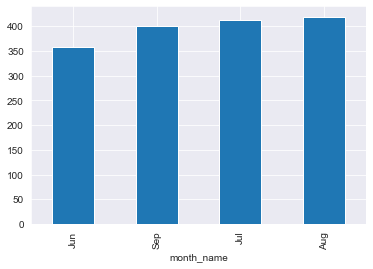

In [182]:
adf.groupby(by='month_name')['atliqo_revenue_crores'].sum().sort_values(ascending=True).plot(kind='bar')

In [184]:
df.head()

,date,city_code,company,atliqo_revenue_crores,arpu,active_users_lakhs,unsubscribed_users_lakhs,city_name,month_name,before/after_5g,time_period
0,01-Jan-22,400001,Atliqo,60.69,192,31.61,1.90,Mumbai,Jan,Before 5G,1
1,01-Jan-22,110001,Atliqo,42.71,175,24.41,1.31,Delhi,Jan,Before 5G,1
2,01-Jan-22,700001,Atliqo,36.91,175,21.09,1.25,Kolkata,Jan,Before 5G,1
3,01-Jan-22,560001,Atliqo,37.40,175,21.37,1.39,Bangalore,Jan,Before 5G,1
4,01-Jan-22,600001,Atliqo,30.80,203,15.17,1.12,Chennai,Jan,Before 5G,1


In [191]:
new_plan

,date,city_code,plan,plan_revenue_crores,plan_description
0,01-Jan-22,400001,p1,6.26,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1,01-Jan-22,110001,p1,4.58,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
2,01-Jan-22,700001,p1,4.29,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
3,01-Jan-22,560001,p1,4.26,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
4,01-Jan-22,600001,p1,3.60,Smart Recharge Pack (2 GB / Day Combo For 3 mo...
...,...,...,...,...,...
1195,01-Sep-22,800008,p13,0.19,Mini Ultra Saver Pack (750 MB/Day for 28 Days)
1196,01-Sep-22,641001,p13,0.21,Mini Ultra Saver Pack (750 MB/Day for 28 Days)
1197,01-Sep-22,160017,p13,0.15,Mini Ultra Saver Pack (750 MB/Day for 28 Days)
1198,01-Sep-22,122001,p13,0.09,Mini Ultra Saver Pack (750 MB/Day for 28 Days)


In [199]:
new_plan.groupby(by='plan')['plan_revenue_crores'].sum().sort_values(ascending=False)

plan
p1     419.93
p2     297.53
p3     261.54
p4     195.22
p11    185.95
p5     165.61
p6     124.37
p12    116.13
p7      73.80
p8      43.43
p13     31.45
p9      22.68
p10     13.11
Name: plan_revenue_crores, dtype: float64

In [200]:
new_plan.groupby(by='date')['plan_revenue_crores'].sum().sort_values(ascending=False)

date
01-Jul-22    280.22
01-Aug-22    279.08
01-Sep-22    268.36
01-Jun-22    240.72
01-Feb-22    239.76
01-Mar-22    229.24
01-Apr-22    219.86
01-Jan-22    193.51
Name: plan_revenue_crores, dtype: float64

In [204]:
new_plan['plan_description'].value_counts()

Smart Recharge Pack (2 GB / Day Combo For 3 months)     120
Super Saviour Pack (1.5 GB / Day Combo For 56 days)     120
Elite saver Pack (1 GB/ Day) Valid: 28 Days             120
Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days       120
Rs. 99 Full Talktime Combo Pack                         120
Xstream Mobile Data Pack: 15GB Data | 28 days           120
25 GB Combo 3G / 4G Data Pack                           120
Daily Saviour (1 GB / Day) validity: 1 Day               60
Combo TopUp: 14.95 Talktime and 300 MB data              60
Big Combo Pack (6 GB / Day) validity: 3 Days             60
Ultra Fast Mega Pack (3GB / Day Combo For 80 days)       60
Ultra Duo Data Pack (1.8GB / Day Combo For 55 days )     60
Mini Ultra Saver Pack (750 MB/Day for 28 Days)           60
Name: plan_description, dtype: int64